# Decision Tree

Dataset: NOAA Reef Check Bleaching Data from Kaggle

Link: https://www.kaggle.com/datasets/oasisdata/noaa-reef-check-coral-bleaching-data

The original dataset is used.

In [19]:
# Imported necessary libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [20]:
# Accessing the dataset
url = 'https://raw.githubusercontent.com/alyshapm/coral-reef-bleaching/main/dataset/NOAA_Reef_Check__Bleaching_Data.csv'
df = pd.read_csv(url)
df.head()

Bleaching     Ocean  Year  Depth Storms HumanImpact     Siltation Dynamite  \
0        No  Atlantic  2005    4.0    yes        high         often     none   
1        No   Red Sea  2004    6.0     no        high  occasionally     none   
2        No   Pacific  1998    3.0     no         low         never     none   
3        No   Pacific  1998   10.0     no         low         never     none   
4        No  Atlantic  1997   10.0     no        high         never     none   

  Poison Sewage Industrial Commercial  
0   none   high       none       none  
1   none    low       none       none  
2   none   none        low       none  
3   none   none        low       none  
4   none   high   moderate       none

In [21]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.3)

train_data

Bleaching     Ocean  Year  Depth Storms HumanImpact     Siltation  \
1372        No   Pacific  2003   10.0    yes        high         never   
2407        No   Pacific  2006    6.0    yes         low  occasionally   
3932        No   Pacific  2005   10.0    yes         low         never   
5906        No   Red Sea  2009    5.0     no        none  occasionally   
6136        No    Indian  2009    7.0    yes    moderate  occasionally   
...        ...       ...   ...    ...    ...         ...           ...   
263         No   Pacific  2006   10.0     no         low         never   
4661        No   Pacific  2003   10.0    yes        high         never   
4977        No   Pacific  2011    5.0     no         low         never   
7521        No  Atlantic  2006    5.0    yes    moderate         often   
5439        No   Red Sea  2015   10.0     no        high  occasionally   

     Dynamite Poison Sewage Industrial Commercial  
1372      low    low    low       none       none  
2407     none   none   none       none       none  
3932     none   none    low       none       none  
5906     none   none   none       none   moderate  
6136      low   none   none       none       none  
...       ...    ...    ...        ...        ...  
263      none   none    low       none        low  
4661     none   none   high       high       none  
4977     none   none   none       none       none  
7521     none   none    low       none   moderate  
5439     none   none    low        low       none  

[6377 rows x 12 columns]

In [22]:
test_data

Bleaching         Ocean  Year  Depth Storms HumanImpact     Siltation  \
2229        No       Pacific  2003   12.0    yes    moderate  occasionally   
6421        No        Indian  1997    3.0    yes         low         never   
6947        No      Atlantic  2006   10.0    yes        high         often   
5218        No       Pacific  1997    3.0    yes    moderate         never   
3531        No       Pacific  2004    0.9     no         low         never   
...        ...           ...   ...    ...    ...         ...           ...   
3858        No       Pacific  2009    3.0    yes         low  occasionally   
6340        No  Arabian Gulf  2014    4.0    yes         low         never   
26          No       Pacific  2012    5.0     no    moderate  occasionally   
3831        No       Pacific  2005    3.0     no         low         never   
5152        No      Atlantic  1998    5.0     no         low         never   

     Dynamite Poison    Sewage Industrial Commercial  
2229      low   high  moderate       none       none  
6421     none   none      none       none       none  
6947     none   none      none       none       none  
5218     none    low      none       none       none  
3531     none   none      none       none       none  
...       ...    ...       ...        ...        ...  
3858     none   none      none       none       none  
6340     none   none      none       none       none  
26       none   none      none       none       high  
3831     none   none      none       none       none  
5152     none   none      none       none       none  

[2734 rows x 12 columns]

In [23]:
# Splitting the dataset into features and target variable
feature_cols=['Storms','HumanImpact', 'Siltation','Dynamite','Poison', 'Sewage', 'Industrial','Commercial']
X = test_data[feature_cols] # Features
y = test_data['Bleaching'] # Target variable

In [24]:
# .get_dummies() converts categorical data into dummy variables
X = pd.get_dummies(X)

In [25]:
X.head()

Storms_no  Storms_yes  HumanImpact_high  HumanImpact_low  \
2229          0           1                 0                0   
6421          0           1                 0                1   
6947          0           1                 1                0   
5218          0           1                 0                0   
3531          1           0                 0                1   

      HumanImpact_moderate  HumanImpact_none  Siltation_always  \
2229                     1                 0                 0   
6421                     0                 0                 0   
6947                     0                 0                 0   
5218                     1                 0                 0   
3531                     0                 0                 0   

      Siltation_never  Siltation_occasionally  Siltation_often  ...  \
2229                0                       1                0  ...   
6421                1                       0                0  ...   
6947                0                       0                1  ...   
5218                1                       0                0  ...   
3531                1                       0                0  ...   

      Sewage_moderate  Sewage_none  Industrial_high  Industrial_low  \
2229                1            0                0               0   
6421                0            1                0               0   
6947                0            1                0               0   
5218                0            1                0               0   
3531                0            1                0               0   

      Industrial_moderate  Industrial_none  Commercial_high  Commercial_low  \
2229                    0                1                0               0   
6421                    0                1                0               0   
6947                    0                1                0               0   
5218                    0                1                0               0   
3531                    0                1                0               0   

      Commercial_moderate  Commercial_none  
2229                    0                1  
6421                    0                1  
6947                    0                1  
5218                    0                1  
3531                    0                1  

[5 rows x 30 columns]

In [26]:
# Importing the necessary libraries
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

import pandas as pd
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
import warnings

warnings.filterwarnings("ignore")

In [27]:
# Using DecisionTreeClassifier from sklearn with entropy as the criterion
model=DecisionTreeClassifier(criterion='entropy')
model.fit(X,y)
y_predict = model.predict(X)

# Getting the accuracy score of the prediction
print(metrics.accuracy_score(y,y_predict))

0.9751280175566935


In [28]:
# Printing the arrays of y and y_predict
# .ravel() returns a 1d array of the input-array elements with the same type
print(y.ravel())
print(y_predict.ravel())

['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']


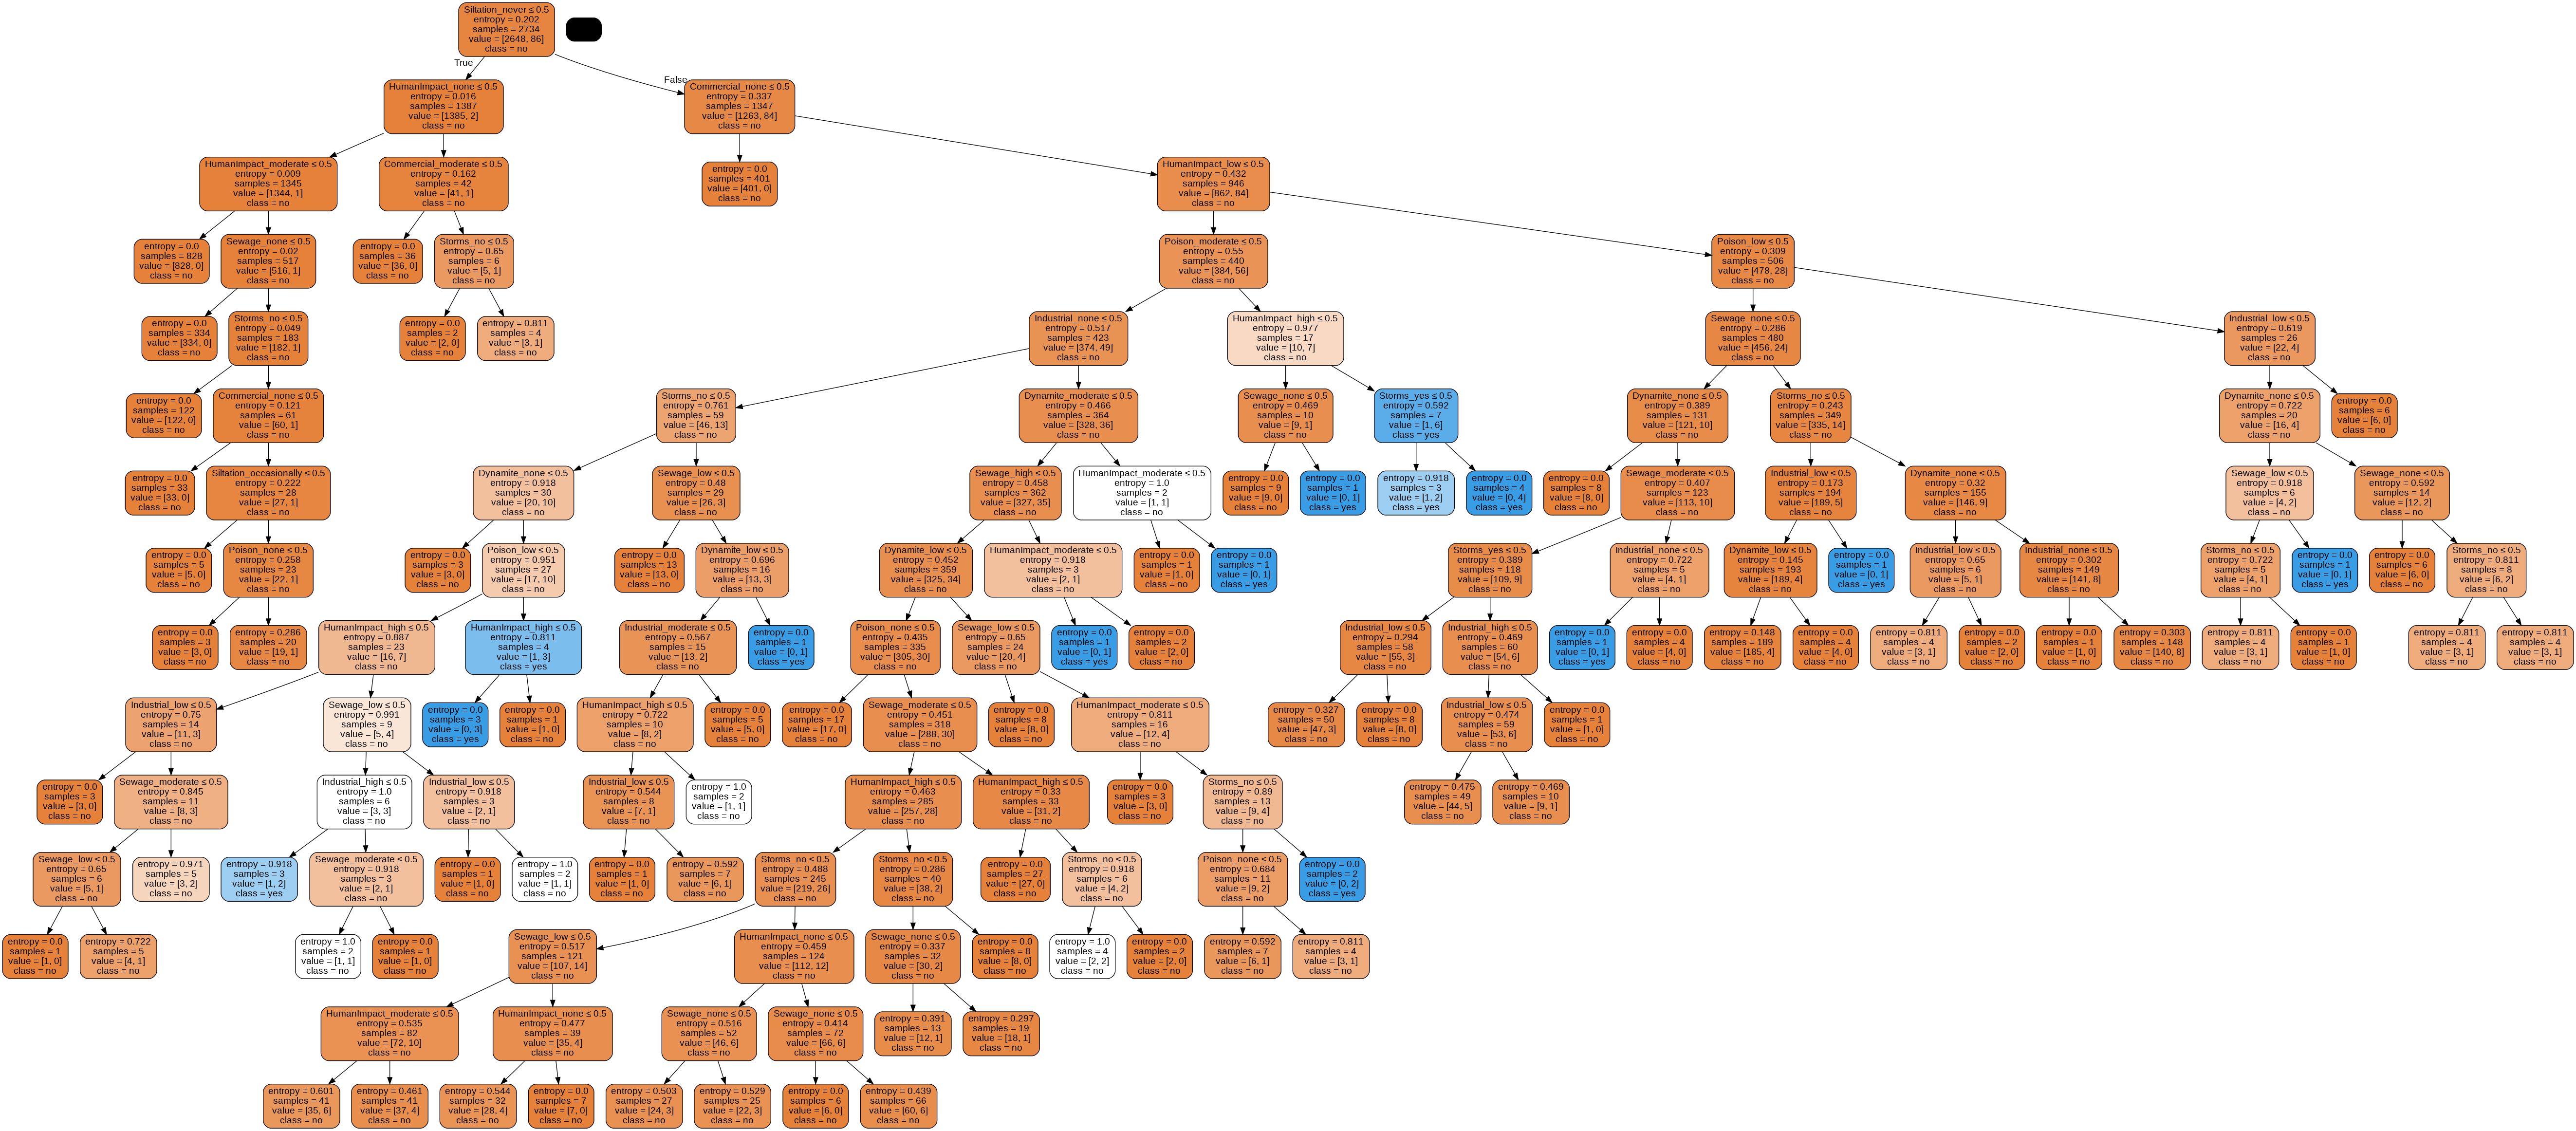

In [29]:
# Displaying the decision tree by creating it using graphs
dot_data = StringIO()

# export_graphviz is used to export a decision tree in DOT format
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['no','yes'])

# The DOT format is then made into a graph using .graph_from_dot_data()
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bleaching_probability.png')
Image(graph.create_png())

In [30]:
print(classification_report(y_predict, y, zero_division=0))

              precision    recall  f1-score   support

          No       1.00      0.98      0.99      2712
         Yes       0.23      0.91      0.37        22

    accuracy                           0.98      2734
   macro avg       0.62      0.94      0.68      2734
weighted avg       0.99      0.98      0.98      2734



0.9774188489885526
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']


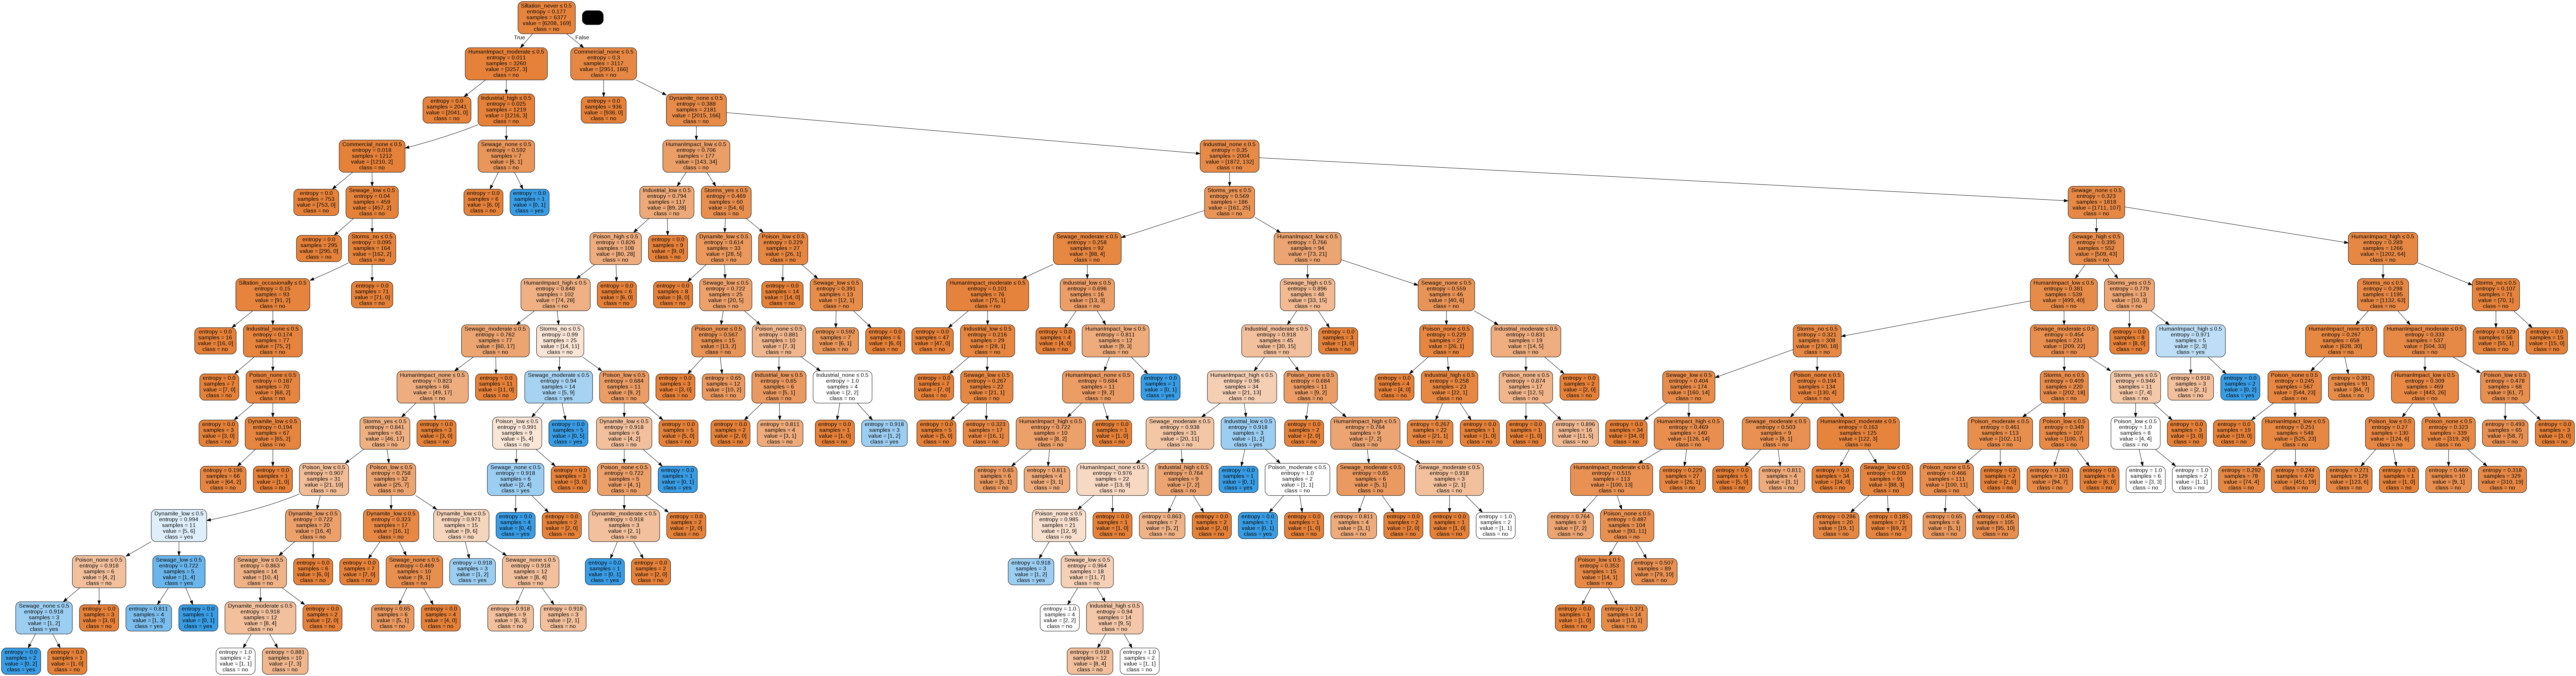

In [31]:
# Decision tree for train data

feature_cols=['Storms','HumanImpact', 'Siltation','Dynamite','Poison', 'Sewage', 'Industrial','Commercial']
X = train_data[feature_cols] # Features
y = train_data['Bleaching'] # Target variable

X = pd.get_dummies(X)

# Using DecisionTreeClassifier from sklearn with entropy as the criterion
model=DecisionTreeClassifier(criterion='entropy')
model.fit(X,y)
y_predict = model.predict(X)

# Getting the accuracy score of the prediction
print(metrics.accuracy_score(y,y_predict))

# Printing the arrays of y and y_predict
# .ravel() returns a 1d array of the input-array elements with the same type
print(y.ravel())
print(y_predict.ravel())

# Displaying the decision tree by creating it using graphs
dot_data = StringIO()

# export_graphviz is used to export a decision tree in DOT format
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['no','yes'])

# The DOT format is then made into a graph using .graph_from_dot_data()
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bleaching_probability_train.png')
Image(graph.create_png())

In [32]:
print(classification_report(y_predict, y, zero_division=0))

              precision    recall  f1-score   support

          No       1.00      0.98      0.99      6344
         Yes       0.17      0.88      0.29        33

    accuracy                           0.98      6377
   macro avg       0.59      0.93      0.64      6377
weighted avg       1.00      0.98      0.98      6377



# Evaluation

Based on our testing, the accuracy scores yielded very similar results as shown here:  

> Testing data = 0.9798829553767374
>
> Training data = 0.9755370864042653

One thing to note, despite being very similar in accuracy score, they are both different looking trees in comparison. 

Because the accuracy of the test data is very similar, the training of the data is successful.
